<h1>Intro</h1>

In [ ]:
#!pip install yfinance
#!pip install yahoofinancials

import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

#import statsmodels.tsa.stattools as ts
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

#from pandas import datetime
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
import pmdarima as pm
from numpy import inf


import warnings
warnings.filterwarnings('ignore')

In [ ]:
def forecast_accuracy(forecast, actual):
    #clear zeros in actual
    #print(forecast, actual)
    forecast = np.array([a for a,b in zip(forecast,actual) if b !=0])
    actual = np.array([b for b in actual if b !=0])
    #print(forecast, actual)
    
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)       # MSE
    rmse = mse**.5                              # RMSE
    temp_cor1 = forecast.reshape(len(forecast))
    temp_cor2 = actual.reshape(len(forecast))
    corr = np.corrcoef(temp_cor1, temp_cor2)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    #clean zeros in maxs
    mins = np.array([a for a,b in zip(mins,maxs) if b !=0])
    maxs = np.array([b for b in maxs if b !=0])
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]              # ACF1
    scalar_product = np.sum(forecast*actual)
    custom1 = np.sum(np.abs(actual)*np.sign(forecast*actual))
    long_income = np.sum(np.abs(actual)*np.sign(forecast*actual)*(np.sign(actual)>0))
    short_income = np.sum(np.abs(actual)*np.sign(forecast*actual)*(np.sign(actual)<0))
    guess_sign = np.mean(np.sign(forecast*actual)>0)
    guess_sign_pos = np.mean((np.sign(forecast*actual)>0)*(np.sign(actual)>0))
    guess_sign_pos /= np.mean(np.sign(actual)>0)
    guess_sign_neg = np.mean((np.sign(forecast*actual)>0)*(np.sign(actual)<0))
    guess_sign_neg /= np.mean(np.sign(actual)<0)
    
    accuracy = {'mape': mape, 'me': me, 'mae': mae,
            'mpe': mpe, 'rmse': rmse,
            'corr': corr, 'minmax': minmax, 'scalar product': scalar_product,
            'custom1': custom1, 'long_income': long_income, 'short_income': short_income,
            'guess_sign': '{:.1%}'.format(guess_sign),
            'guess_+': '{:.1%}'.format(guess_sign_pos),
            'guess_-': '{:.1%}'.format(guess_sign_neg)}
    
    for i in accuracy:
        print (i,':',accuracy[i])
    result = np.array([mape, me, mae, mpe, rmse, corr, minmax, scalar_product, custom1, long_income, short_income,
                       guess_sign, guess_sign_pos, guess_sign_neg])
    return result

In [ ]:
#end = dt.datetime.today()
end = "2021-06-01"
start="1990-01-01"
#start="2004-01-01"

amazon_df = pd.DataFrame(yf.download("^DJI", start=start, end = end)['Adj Close'])
'''
col_names = ["TradeDate","PFTS Index","Previous PFTS Index","Variation","Max 52 Weeks Index","Max 52 Weeks Index Date","Min 52 Weeks Index","Min 52 Weeks Index Date"]
amazon_df = pd.read_csv('pfts.csv', names=col_names, sep=';', index_col='TradeDate', skiprows=50, skipfooter = 510)
#amazon_df = amazon_df['PFTS Index']
amazon_df['PFTS Index'] = amazon_df['PFTS Index'].apply(lambda x: float(x.split()[0].replace(',', '')))
print(amazon_df['PFTS Index'])
amazon_df['PFTS Index']=amazon_df['PFTS Index'].astype(float)
amazon_df = pd.DataFrame(amazon_df['PFTS Index'])
#amazon_df = amazon_df.values
#amazon_df = [item for sublist in amazon_df for item in sublist]

#amazon_df = amazon_df.values
'''
amazon_df.plot.line(figsize=(20, 8), color = "darkblue")


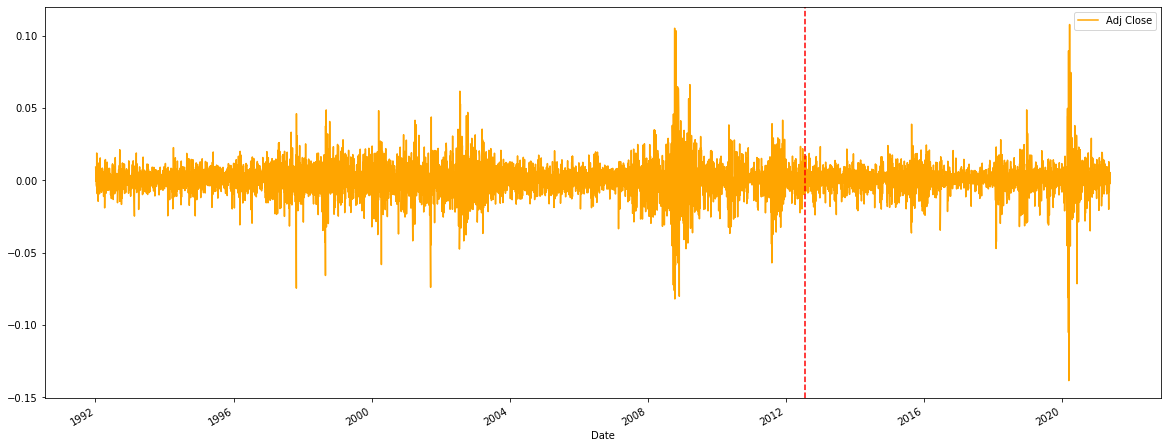

In [32]:
amazon_df_chng = np.log(amazon_df / amazon_df.shift(1))
amazon_df_chng = amazon_df_chng.dropna()
ax = amazon_df_chng.plot(figsize=(20, 8), color='orange')
ax.axvline(train.index[-1], color="red", linestyle="--")

In [33]:
#print(len(amazon_df_chng))
train, test = np.split(amazon_df_chng, [int(.7 *len(amazon_df_chng))])
train
#traino, testo = np.split(amazon_df, [int(.7 *len(amazon_df_chng))])
#print(train)
#print(test)
rw = amazon_df_chng[-2-int(.3 *len(amazon_df_chng)):-1]
#print(rw)
np.array(rw).reshape(len(test),1)
#print(rw)
#temp = [item for sublist in test for item in sublist]
temp = test.values
#print(temp)
tempo = [np.sign(i) for i in temp]
tempo = np.array(tempo)
tempo.reshape(len(test),1)
tempo = np.ones((len(test), 1))
#print(tempo)
#tempo = [[el] for el in tempo]
#print(len(test), len(train), type(tempo), type(temp.values), tempo.shape, temp.values.shape)
#tempo[0] = [0]
tempo[1] = [1]
#tempo[tempo == 0] = inf
#print(temp.values, tempo)
forecast_accuracy(tempo, temp)
trainu, testu = np.split(amazon_df, [int(.7 *len(amazon_df_chng))])
print(testu)


mape : 1130.0812342763259
me : 0.999562585557733
mae : 0.999562585557733
mpe : -247.00807735106818
rmse : 0.9996217881471858
corr : nan
minmax : 0.9995625855577329
scalar product : 0.9710600618328693
custom1 : 0.9710600618328693
long_income : 7.842430560780054
short_income : -6.871370498947185
guess_sign : 54.9%
guess_+ : 100.0%
guess_- : 0.0%
               Adj Close
Date                    
2012-07-27  13075.660156
2012-07-30  13073.009766
2012-07-31  13008.679688
2012-08-01  12976.129883
2012-08-02  12878.879883
...                  ...
2021-05-24  34393.980469
2021-05-25  34312.460938
2021-05-26  34323.050781
2021-05-27  34464.640625
2021-05-28  34529.449219

[2224 rows x 1 columns]


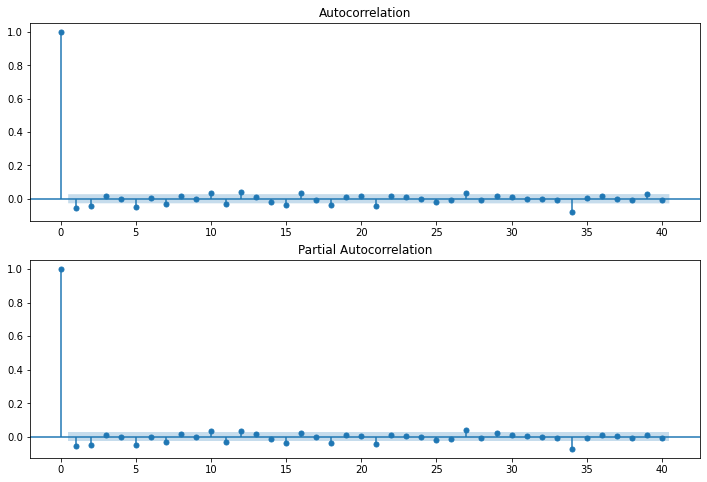

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=40, ax = ax1)   
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=40, ax = ax2)

2012-07-27 00:00:00


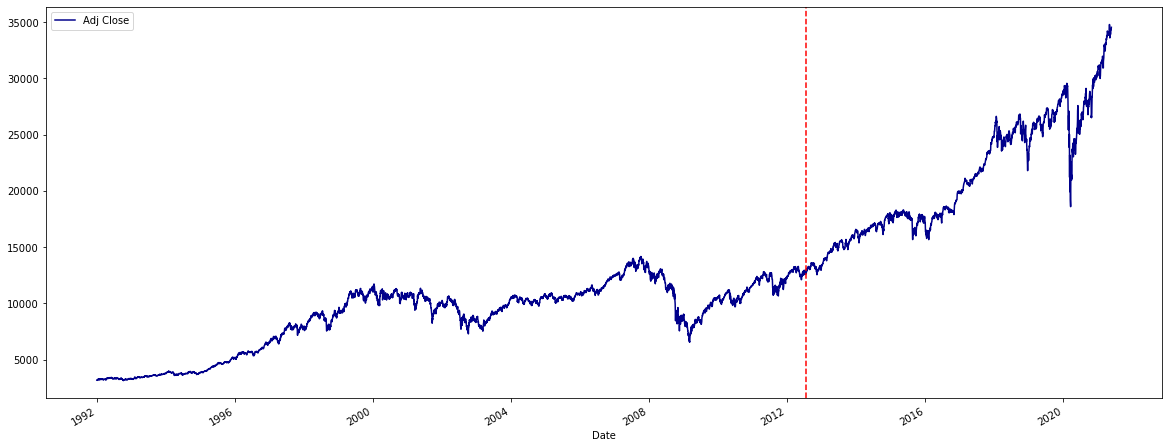

In [35]:
print(train.index[-1])
ax = amazon_df.plot.line(figsize=(20, 8), color = "darkblue")
# you can add here as many lines as you want
#ax.axhline(6, color="red", linestyle="--")
ax.axvline(train.index[-1], color="red", linestyle="--")

<h1>White noise</h1>

In [ ]:
noise = np.random.normal(np.mean(train.values),np.std(train.values),len(test)).reshape(len(test),1)
print(np.mean(train.values), np.mean(noise), np.mean(test.values))
print(np.std(train.values), np.std(noise), np.std(test.values))
print(noise.shape)
print(type(noise))
print(noise.shape)
forecast_accuracy(noise, test.values)

In [ ]:
temp_train = train.values
temp_train = [item for sublist in temp_train for item in sublist]
temp_test = test.values
#temp_test = [item for sublist in temp_test for item in sublist]
history = [x for x in temp_train]
predict_wn_test = list()

In [ ]:
import time
start_time = time.time()

for t in range(len(temp_test)):
    noise = np.random.normal(np.mean(history),np.std(history),1)[0]
    #print(noise)
    predict_wn_test.append(noise)
    obs = temp_test[t]
    history.append(obs)
    if t%100 == 0:
        print(t)
    #print('predicted=%f, expected=%f' % (yhat, obs))

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
#print(predict_wn_test)
#predict_wn_test = [item for sublist in predict_wn_test for item in sublist]
print(predict_wn_test)



# evaluate forecasts
temp_test = np.array(temp_test).reshape(len(temp_test),1)
predict_wn_test = np.array(predict_wn_test).reshape(len(temp_test),1)
forecast_accuracy(predict_wn_test, temp_test)
forecast_accuracy(tempo, predict_wn_test)
# plot forecasts against actual outcomes
plt.plot(temp_test)
plt.plot(predict_wn_test, color='red')
plt.show()


In [ ]:
result_list = []
repetition = 1000
for i in range(repetition):
    
    noise = np.random.normal(np.mean(train.values),np.std(train.values),len(test)).reshape(len(test),1)
    #forecast_accuracy(noise, test.values)
    result_list.append(forecast_accuracy(noise, test.values))

result_av = []
#print(result_av)
for k in range(14):
    temp = 0
    for j in range(repetition):
        temp += result_list[j][k]
    result_av.append(temp/repetition)
print(result_av)    

accuracy = {'mape': result_av[0], 'me': result_av[1], 'mae': result_av[2],
            'mpe': result_av[3], 'rmse': result_av[4],
            'corr': result_av[5], 'minmax': result_av[6], 'scalar product': result_av[7],
            'custom': result_av[8], 'long income': result_av[9], 'short_income': result_av[10], 'guess_sign': '{:.1%}'.format(result_av[11]),
           'guess_+': '{:.1%}'.format(result_av[12]), 'guess_-': '{:.1%}'.format(result_av[13])}
for i in accuracy:
    print (i,':',accuracy[i])

<h3>Commented<h3>

In [ ]:
'''
from statsmodels.tsa.arima_model import ARIMA
import itertools
# Grid Search
p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q
combs = {} # stores bic and order pairs
bics = [] # stores bics
# Grid Search continued
for combination in pdq:
    try:
        model = ARIMA(amazon_df_chng, order=combination) # create all possible models
        model = model.fit()
        combs.update({model.bic : combination}) # store combinations
        bics.append(model.bic)
    except:
        continue
        
best_bic = min(bics)

# Model Creation and Forecasting
model = ARIMA(amazon_df_chng, order=combs[best_bic])
model = model.fit()
model.forecast(7)[0]
print(model.bic)
print(model.summary())
'''

<h1>Arima<h1>

In [ ]:
from itertools import product
# setting initial values and some bounds for them
ps = range(0, 8)
ds = range(0, 2)
qs = range(0, 8)


# creating list with all the possible combinations of parameters
parameters = product(ps, ds, qs)
parameters_list = list(parameters)
len(parameters_list)

In [ ]:
def optimizeARIMA(input, parameters_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_bic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=ARIMA(input, order=(param[0], param[1], param[2])).fit(disp=1)
        except:
            continue
        bic = model.bic
        # saving best model, BIC and parameters
        if bic < best_bic:
            best_model = model
            best_bic = bic
            best_param = param
        results.append([param, model.bic, model.aic])
    print(results)
    result_table = pd.DataFrame(results)

    result_table.columns = ['parameters', 'bic', 'aic']

    # sorting in ascending order, the lower BIC is - the better
    result_table = result_table.sort_values(by='bic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
from tqdm import tqdm_notebook

#%%time
result_table = optimizeARIMA(train, parameters_list)

In [ ]:
print(result_table)

In [ ]:
model_arima_train = ARIMA(train, order=(1,0,1))
model_fit_arima_train = model_arima_train.fit(disp=0)
print(model_fit_arima_train.aic)
print(model_fit_arima_train.summary())

In [ ]:
residuals_arima_train = pd.DataFrame(model_fit_arima_train.resid)
fig, ax = plt.subplots(1,2)
residuals_arima_train.plot(title="Residuals", ax=ax[0])
residuals_arima_train.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
model_arima_test = ARIMA(test, order=(0,0,0))
model_fit_arima_test = model_arima_test.fit(disp=0)
print(model_fit_arima_test.aic)
print(model_fit_arima_test.summary())

In [ ]:
residuals_arima_test = pd.DataFrame(model_fit_arima_test.resid)

#print(residuals_arima_test)
residuals_arima_test = residuals_arima_test.to_numpy()
print(residuals_arima_test)
residuals_arima_test = [item for sublist in residuals_arima_test for item in sublist]
print(residuals_arima_test)

In [ ]:
model_fit.plot_predict(dynamic=False)

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(1)
plt.rcParams["figure.figsize"] = (40,30)
plt.show()

<h2>Restricted ARIMA<h2>

<h5>AR  2<h5>

In [ ]:
#model_restricted_train = sm.tsa.statespace.SARIMAX(train, order=((0,0,0,0,0,1),0,0))
model_restricted_train = ARIMA(history, order=(1,0,1))
model_fit_restricted_train = model_restricted_train.fit(disp=0)
print(model_fit_restricted_train.bic)
print(model_fit_restricted_train.summary())

In [17]:
residuals_restricted_train = pd.DataFrame(model_fit_restricted_train.resid)
fig, ax = plt.subplots(1,2)
residuals_restricted_train.plot(title="Residuals", ax=ax[0])
residuals_restricted_train.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit_restricted_train' is not defined

In [18]:
temp_train = train.values
#temp_train = [item for sublist in temp_train for item in sublist]
temp_test = test.values
#temp_test = [item for sublist in temp_test for item in sublist]
history = [x for x in temp_train]
predict_restricted_test = list()
residuals_restricted_test = []

In [ ]:
import time
start_time = time.time()

for t in range(len(temp_test)):
    #model = sm.tsa.statespace.SARIMAX(train, order=((0,0,0,0,0,1),0,0))
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predict_restricted_test.append(yhat)
    obs = temp_test[t]
    history.append(obs)
    if t%100 == 0:
        print(t)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    residuals_restricted_test.append(obs-yhat)

print("--- %s seconds ---" % (time.time() - start_time))

In [19]:
# evaluate forecasts
residuals_restricted_test = np.array(residuals_restricted_test).reshape(len(temp_test),1)
temp_test = np.array(temp_test).reshape(len(temp_test),1)
predict_restricted_test = np.array(predict_restricted_test).reshape(len(temp_test),1)
forecast_accuracy(predict_restricted_test, temp_test)
# plot forecasts against actual outcomes
plt.plot(temp_test)
plt.plot(predict_restricted_test, color='red')
plt.show()

ValueError: cannot reshape array of size 0 into shape (2223,1)

In [20]:
#residuals_restricted_test = np.subtract(test, predictions)
print(test)
#print(predictions)
print(residuals_restricted_test)
#residuals_restricted_test = residuals_restricted_test.to_numpy()
#residuals_restricted_test = [item for sublist in residuals_restricted_test for item in sublist]

            Adj Close
Date                 
2012-07-30  -0.000203
2012-07-31  -0.004933
2012-08-01  -0.002505
2012-08-02  -0.007523
2012-08-03   0.016731
...               ...
2021-05-24   0.005427
2021-05-25  -0.002373
2021-05-26   0.000309
2021-05-27   0.004117
2021-05-28   0.001879

[2223 rows x 1 columns]
[]


<h1>Machine Learnin'</h1>

In [36]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
# hybrid
#raw_seq = residuals_restricted_train.to_numpy()
#print(residuals_restricted_train)
# vanilla
raw_seq = train.to_numpy()
raw_seq = [item for sublist in raw_seq for item in sublist]


<h2>MLP 3 - 8 - 1<h2>

In [24]:
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)

# define model
model_3_8 = Sequential()
model_3_8.add(Dense(12, activation='relu', input_dim=n_steps))
model_3_8.add(Dense(1))
model_3_8.compile(optimizer='adam', loss='mse')

import time
start_time = time.time()

# fit model
model_3_8.fit(X, y, epochs=20, verbose=0)

print("--- %s seconds ---" % (time.time() - start_time))
print(model_3_8.summary())


--- 3.564591884613037 seconds ---
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
None


<h3>Validation<h3>

mape : 1.3035417181254931
me : -0.0007193341867515708
mae : 0.006661689477764879
mpe : -0.8660680855948052
rmse : 0.010864960373502555
corr : 0.09729647328881762
minmax : 106.9198422176001
scalar product : 0.003486608127891111
custom1 : 0.3232674429089677
long_income : -2.386713089524041
short_income : 2.7099805324330086
guess_sign : 48.7%
guess_+ : 25.0%
guess_- : 77.6%


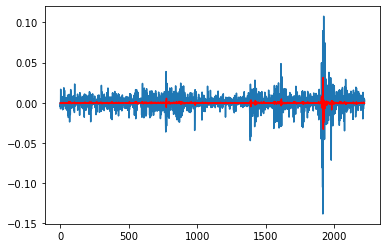

In [29]:
# RABOTAET!!!

# vanilla
tail_test = temp_test
# hybrid
#tail_test = residuals_restricted_test

tail_test = [item for sublist in tail_test for item in sublist]

temp_resid = raw_seq[-n_steps:]+tail_test
#print(temp_test)
X, y = split_sequence(temp_resid, n_steps)
mlp_8_predict = model_3_8.predict(X, verbose=0)
mlp_8_predict_list = [item for sublist in mlp_8_predict for item in sublist]
mlp_8_predict_list = np.array(mlp_8_predict_list).reshape(len(temp_test),1)

tail_test = np.array(tail_test).reshape(len(temp_test),1)

# vanilla
result_8_predict = mlp_8_predict_list
# hybrid
#result_8_predict = np.add(mlp_8_predict_list, predict_restricted_test)

forecast_accuracy(result_8_predict, tail_test)

#print(temp_test, residuals_restricted_test, predict_restricted_test, mlp_8_predict_list, hybrid_mlp_8_predict_list)
#print(temp_test.shape, forecast_restricted_test.shape, residuals_restricted_test.shape,
#      mlp_8_predict_list.shape, mlp_8_predict_list+forecast_restricted_test.shape, hybrid_mlp_8_predict_list.shape)



plt.plot(tail_test)
plt.plot(result_8_predict, color='red')
plt.show()

In [38]:
from __future__ import division
def mean(a):
    return sum(a) / len(a)
a = [[240, 240, 239],
     [250, 249, 237], 
     [242, 239, 237],
     [240, 234, 233]]


opti_repetition = 1
aggregate = []

for i in range(opti_repetition):
    # choose a number of time steps
    n_steps = 5
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    n_features = 1
    #X = X.reshape((X.shape[0], X.shape[1], n_features))
    
    # define model
    model_3_8 = Sequential()
    model_3_8.add(Dense(12, activation='relu', input_dim=n_steps))
    model_3_8.add(Dense(1))
    model_3_8.compile(optimizer='adam', loss='mse')

    #tail_test = temp_test
    tail_test = residuals_restricted_test

    tail_test = [item for sublist in tail_test for item in sublist]

    temp_resid = raw_seq[-n_steps:]+tail_test

    X_test, Y_test = split_sequence(temp_resid, n_steps)
    #X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
    
    import time
    start_time = time.time()

    # fit model
    train_history = model_3_8.fit(X, y, epochs=20, verbose=0, validation_data=(X_test, Y_test))

    print("--- %s seconds ---" % (time.time() - start_time))
    #print(model_3_8.summary())
    
    losses_lstm = model_3_8.history.history['loss']
    #plt.figure(figsize=(12,4))
    #plt.xlabel("Epochs")
    #plt.ylabel("Loss")
    #plt.xticks(np.arange(0,len(losses_lstm)+1,1))
    #plt.plot(range(len(losses_lstm)),losses_lstm);
    
    loss = train_history.history['loss']
    #val_loss = train_history.history['val_loss']
    #print(type(train_history.history['val_loss']))
    #t = pd.Series(val_loss)
    #aggregate.append(list(t))
    print(train_history.history.keys())

    #plt.plot(loss)
    #plt.plot(t)
    #plt.legend([ 'val_loss'])
    #plt.show()
    


--- 4.199915170669556 seconds ---
dict_keys(['loss'])


In [ ]:
print(len(temp_test))
avg = [float(sum(col))/len(col) for col in zip(*aggregate)]
t = pd.Series(avg)
t = t.rolling(window=3, center=True).mean()
plt.plot(t)
'''from statistics import mean

aggregate_ready = map(mean, zip(*aggregate))
#print(*aggregate_ready)
r = np.array(*aggregate_ready)
print(r)
#print(*map(mean, zip(*aggregate)))'''

<h2>MLP 5 - 12 - 1<h2>

In [ ]:
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
model_5_12 = Sequential()
model_5_12.add(Dense(12, activation='relu', input_dim=n_steps))
model_5_12.add(Dense(1))
model_5_12.compile(optimizer='adam', loss='mse')

import time
start_time = time.time()

# fit model
model_5_12.fit(X, y, epochs=2000, verbose=0)

print("--- %s seconds ---" % (time.time() - start_time))

<h3>Validation<h3>

In [ ]:
# not really
#residuals_test = test.to_numpy()
#residuals_test = [item for sublist in residuals_test for item in sublist]
temp_resid = raw_seq[-n_steps:]+residuals_restricted_test
print(raw_seq[-n_steps:])
X, y = split_sequence(temp_resid, n_steps)
print(X)
mlp_12_predict = model_5_12.predict(X, verbose=0)
mlp_12_predict_list = [item for sublist in mlp_12_predict for item in sublist]
temp_test = np.array(temp_test).reshape(len(temp_test),1)
mlp_12_predict_list = np.array(mlp_12_predict_list).reshape(len(temp_test),1)
forecast_accuracy(mlp_12_predict_list, temp_test)

print(mlp_12_predict_list.shape)
plt.plot(temp_test)
plt.plot(mlp_12_predict_list, color='red')
plt.show()

<h1>LSTM<h1>

In [ ]:

# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model_lstm = Sequential()
model_lstm.add(LSTM(20, activation='relu', input_shape=(n_steps, n_features)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

import time
start_time = time.time()

# fit model
model_lstm.fit(X, y, epochs=5, verbose=0)

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
losses_lstm = model_lstm.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,len(losses_lstm)+1,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
print(model_lstm.summary())

<h3>Validation<h3>

In [ ]:
# not really
#residuals_test = test.to_numpy()
#residuals_test = [item for sublist in residuals_test for item in sublist]
temp_resid = raw_seq[-n_steps:]+residuals_restricted_test
#print(raw_seq[-n_steps:])
X, y = split_sequence(temp_resid, n_steps)
X = X.reshape((X.shape[0], X.shape[1], n_features))

mlp_lstm_predict = model_lstm.predict(X, verbose=0)
print(type(mlp_lstm_predict))
mlp_lstm_predict_list = [item for sublist in mlp_lstm_predict for item in sublist]
mlp_lstm_predict_list = np.sum(mlp_lstm_predict_list,forecast_restricted_test)
temp_test = np.array(temp_test).reshape(len(temp_test),1)
mlp_lstm_predict_list = np.array(mlp_lstm_predict_list).reshape(len(temp_test),1)
#print(forecast_accuracy(mlp_lstm_predict_list, temp_test))

print(mlp_lstm_predict_list.shape)
plt.plot(temp_test)
plt.plot(mlp_lstm_predict_list, color='red')
plt.show()

<h1>Average<h1>

In [ ]:
result_list = []
repetition = 20
for i in range(repetition):
    # choose a number of time steps
    n_steps = 5
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)

    # define model
    model_5_12 = Sequential()
    model_5_12.add(Dense(12, activation='relu', input_dim=n_steps))
    model_5_12.add(Dense(1))
    model_5_12.compile(optimizer='adam', loss='mse')

    import time
    start_time = time.time()

    # fit model
    model_5_12.fit(X, y, epochs=2000, verbose=0)

    print("--- %s seconds ---" % (time.time() - start_time))
    # RABOTAET!!!

    # vanilla
    tail_test = temp_test
    # hybrid
    #tail_test = residuals_restricted_test

    tail_test = [item for sublist in residuals_restricted_test for item in sublist]

    temp_resid = raw_seq[-n_steps:]+tail_test

    X, y = split_sequence(temp_resid, n_steps)
    mlp_12_predict = model_5_12.predict(X, verbose=0)
    mlp_12_predict_list = [item for sublist in mlp_12_predict for item in sublist]
    mlp_12_predict_list = np.array(mlp_12_predict_list).reshape(len(temp_test),1)

    tail_test = np.array(tail_test).reshape(len(temp_test),1)

    # vanilla
    result_12_predict = mlp_12_predict_list
    # hybrid
    #result_8_predict = np.add(mlp_8_predict_list, predict_restricted_test)

    forecast_accuracy(result_12_predict, tail_test)

    #print(temp_test, residuals_restricted_test, predict_restricted_test, mlp_8_predict_list, hybrid_mlp_8_predict_list)
    #print(temp_test.shape, forecast_restricted_test.shape, residuals_restricted_test.shape,
    #      mlp_8_predict_list.shape, mlp_8_predict_list+forecast_restricted_test.shape, hybrid_mlp_8_predict_list.shape)
    result_list.append(forecast_accuracy(result_12_predict, tail_test))

    print(model_lstm.summary())
    plt.plot(tail_test)
    plt.plot(result_12_predict, color='red')
    plt.show()

result_av = []
#print(result_av)
for k in range(14):
    temp = 0
    for j in range(repetition):
        temp += result_list[j][k]
    result_av.append(temp/repetition)
print(result_av)    

accuracy = {'mape': result_av[0], 'me': result_av[1], 'mae': result_av[2],
            'mpe': result_av[3], 'rmse': result_av[4],
            'corr': result_av[5], 'minmax': result_av[6], 'scalar product': result_av[7],
            'custom': result_av[8], 'long income': result_av[9], 'short_income': result_av[10], 'guess_sign': '{:.1%}'.format(result_av[11]),
           'guess_+': '{:.1%}'.format(result_av[12]), 'guess_-': '{:.1%}'.format(result_av[13])}
for i in accuracy:
    print (i,':',accuracy[i])

In [ ]:
print(result_list)
result_av = []
#print(result_av)
for k in range(9):
    temp = 0
    for j in range(20):
        temp += result_list[j][k]
    result_av.append(temp/20)
print(result_av)

accuracy = {'mape': result_av[0], 'me': result_av[1], 'mae': result_av[2],
            'mpe': result_av[3], 'rmse': result_av[4],
            'corr': result_av[5], 'minmax': result_av[6],
            'custom': result_av[7], 'guess_sign': '{:.1%}'.format(result_av[8]),
           'guess_+': '{:.1%}'.format(result_av[9]), 'guess_+': '{:.1%}'.format(result_av[10])}
for i in accuracy:
    print (i,':',accuracy[i])

In [ ]:
n_steps = 5
repetition = 20

t_t = test.values
t_t = [item for sublist in t_t for item in sublist]

for kakaya_epokha_prashla in range(100, 200, 15):
    result_list = []

    for i in range(repetition):

        # choose a number of time steps
        # split into samples
        X, y = split_sequence(raw_seq, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))

        # define model
        model_lstm = Sequential()
        model_lstm.add(LSTM(20, activation='relu', input_shape=(n_steps, n_features)))
        model_lstm.add(Dense(1))
        model_lstm.compile(optimizer='adam', loss='mse')

        import time
        start_time = time.time()

        # fit model
        model_lstm.fit(X, y, epochs=kakaya_epokha_prashla, verbose=0)

        print("--- %s seconds ---" % (time.time() - start_time))

        # vanilla
        tail_test = temp_test
        # hybrid
        #tail_test = residuals_restricted_test

        tail_test = [item for sublist in tail_test for item in sublist]

        temp_resid = raw_seq[-n_steps:]+tail_test
        X, y = split_sequence(temp_resid, n_steps)
        X = X.reshape((X.shape[0], X.shape[1], n_features))

        mlp_8_predict = model_lstm.predict(X, verbose=0)
        mlp_8_predict_list = [item for sublist in mlp_8_predict for item in sublist]
        mlp_8_predict_list = np.array(mlp_8_predict_list).reshape(len(temp_test),1)

        tail_test = np.array(tail_test).reshape(len(temp_test),1)

        # vanilla
        result_8_predict = mlp_8_predict_list

        #forecast_accuracy(result_8_predict, tail_test)

        #print(temp_test, residuals_restricted_test, predict_restricted_test, mlp_8_predict_list, hybrid_mlp_8_predict_list)
        #print(temp_test.shape, forecast_restricted_test.shape, residuals_restricted_test.shape,
        #      mlp_8_predict_list.shape, mlp_8_predict_list+forecast_restricted_test.shape, hybrid_mlp_8_predict_list.shape)
        result_list.append(forecast_accuracy(result_8_predict, tail_test))

        #print(model_3_8.summary())
        plt.plot(tail_test)
        plt.plot(result_8_predict, color='red')
        plt.show()

        #print(result_list)
    #print(result_list[9][8])
    result_av = []
    #print(result_av)
    for k in range(14):
        temp = 0
        for j in range(repetition):
            temp += result_list[j][k]
        result_av.append(temp/repetition)
    print(kakaya_epokha_prashla)
    print(result_av)    

    accuracy = {'mape': result_av[0], 'me': result_av[1], 'mae': result_av[2],
            'mpe': result_av[3], 'rmse': result_av[4],
            'corr': result_av[5], 'minmax': result_av[6], 'scalar product': result_av[7],
            'custom': result_av[8], 'long income': result_av[9], 'short_income': result_av[10], 'guess_sign': '{:.1%}'.format(result_av[11]),
           'guess_+': '{:.1%}'.format(result_av[12]), 'guess_-': '{:.1%}'.format(result_av[13])}
    for i in accuracy:
        print (i,':',accuracy[i])
    print(result_av)
    